#  Business Case: Yulu - Hypothesis Testing

## About Yulu

Yulu is India’s leading micro-mobility service provider, which offers unique vehicles for the daily commute. Starting off as a mission to eliminate traffic congestion in India, Yulu provides the safest commute solution through a user-friendly mobile app to enable shared, solo and sustainable commuting.

Yulu zones are located at all the appropriate locations (including metro stations, bus stands, office spaces, residential areas, corporate offices, etc) to make those first and last miles smooth, affordable, and convenient!

Yulu has recently suffered considerable dips in its revenues. They have contracted a consulting company to understand the factors on which the demand for these shared electric cycles depends. Specifically, they want to understand the factors affecting the demand for these shared electric cycles in the Indian market.

## Problem Statement:

- Which variables are significant in predicting the demand for shared electric cycles in the Indian market?
- How well those variables describe the electric cycle demands

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import wget
from scipy import stats

In [2]:
df = pd.read_csv('bike_sharing.csv')

In [3]:
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [4]:
print(df.shape)

print(f'Number of Rows: {df.shape[0]}')
print(f'Number of Columns: {df.shape[1]}')

(10886, 12)
Number of Rows: 10886
Number of Columns: 12


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


#### Converting the below features into categorical features:

- season     --> object
- holiday    --> object
- workingday --> object
- weather    --> object

Also here the datetime column has object datatype, so will be converting it to the datetime64 dtype

In [6]:
categorical_cols = ['season', 'holiday', 'workingday', 'weather']

# converting to categorical datatype
df[categorical_cols] = df[categorical_cols].astype('object')

# converting to datetime64 datatype
df['datetime'] = pd.to_datetime(df['datetime'])

In [7]:
df.nunique()

datetime      10886
season            4
holiday           2
workingday        2
weather           4
temp             49
atemp            60
humidity         89
windspeed        28
casual          309
registered      731
count           822
dtype: int64

In [8]:
for i in categorical_cols:
    print(f'Valuecounts for {i}')
    print(df[i].value_counts())
    print('-'*50)

Valuecounts for season
4    2734
3    2733
2    2733
1    2686
Name: season, dtype: int64
--------------------------------------------------
Valuecounts for holiday
0    10575
1      311
Name: holiday, dtype: int64
--------------------------------------------------
Valuecounts for workingday
1    7412
0    3474
Name: workingday, dtype: int64
--------------------------------------------------
Valuecounts for weather
1    7192
2    2834
3     859
4       1
Name: weather, dtype: int64
--------------------------------------------------


In [9]:
df.describe()

,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


From the above statistical summary we can say that __casual__, __registered__ and __count__ features are having outliers. In the later stages of analysis we will be detecting the outliers using boxplots.

#### Now will be checking Null / Missing values and Duplicate records

In [10]:
df.isna().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [11]:
df.duplicated().sum()

0

There are no Null values and Duplicate records in the Dataset

### Outlier Detection:

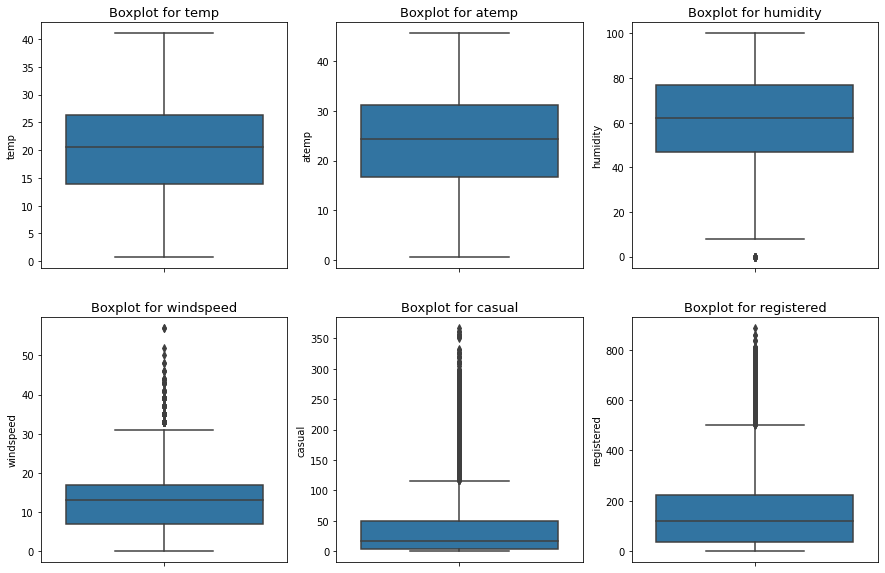

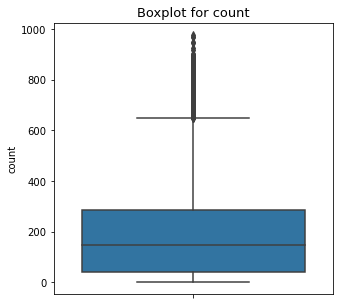

In [12]:
numerical_cols = ['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count']
count = 0

fig, axis = plt.subplots(nrows=2, ncols=3, figsize=(15,4))
fig.subplots_adjust(top=2)

for i in range(2):
    for j in range(3):
        sns.boxplot(data=df, y=numerical_cols[count], ax=axis[i,j]).set_title(f'Boxplot for {numerical_cols[count]}', fontsize=13)
        count += 1
        
plt.figure(figsize=(5,5))
sns.boxplot(data=df, y=numerical_cols[count]).set_title(f'Boxplot for {numerical_cols[count]}', fontsize=13)

plt.show()

In the above boxplots we can clearly see that the features __'windspeed'__, __'casual'__, __'registered'__ and __'count'__ are having the outliers.

## Univariate Analysis:

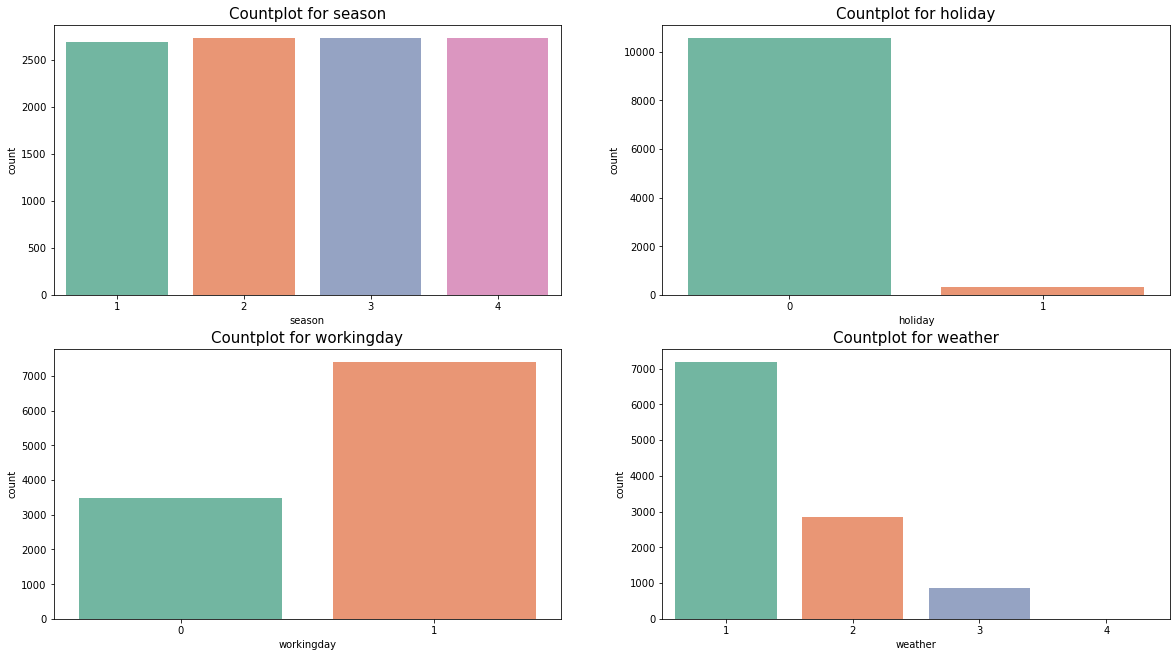

In [13]:
# univariate analysis using countplot for categorical columns

fig, axis = plt.subplots(nrows=2, ncols=2, figsize=(20,6))
fig.subplots_adjust(top=1.5)

count = 0
for i in range(2):
    for j in range(2):
        sns.countplot(data=df, x=categorical_cols[count], ax=axis[i,j], palette='Set2').set_title(f'Countplot for {categorical_cols[count]}', fontsize=15)
        count += 1
        
plt.show()

- There are equal number of days in every season.
- There are less number of holidays and more number of working days.
- Weather conditions are mostly Clear/ Few clouds/ partly cloudy/ partly cloudy. Sometimes it maybe Mist + Cloudy/ Mist + Broken clouds/ Mist + Few clouds/ Mist.

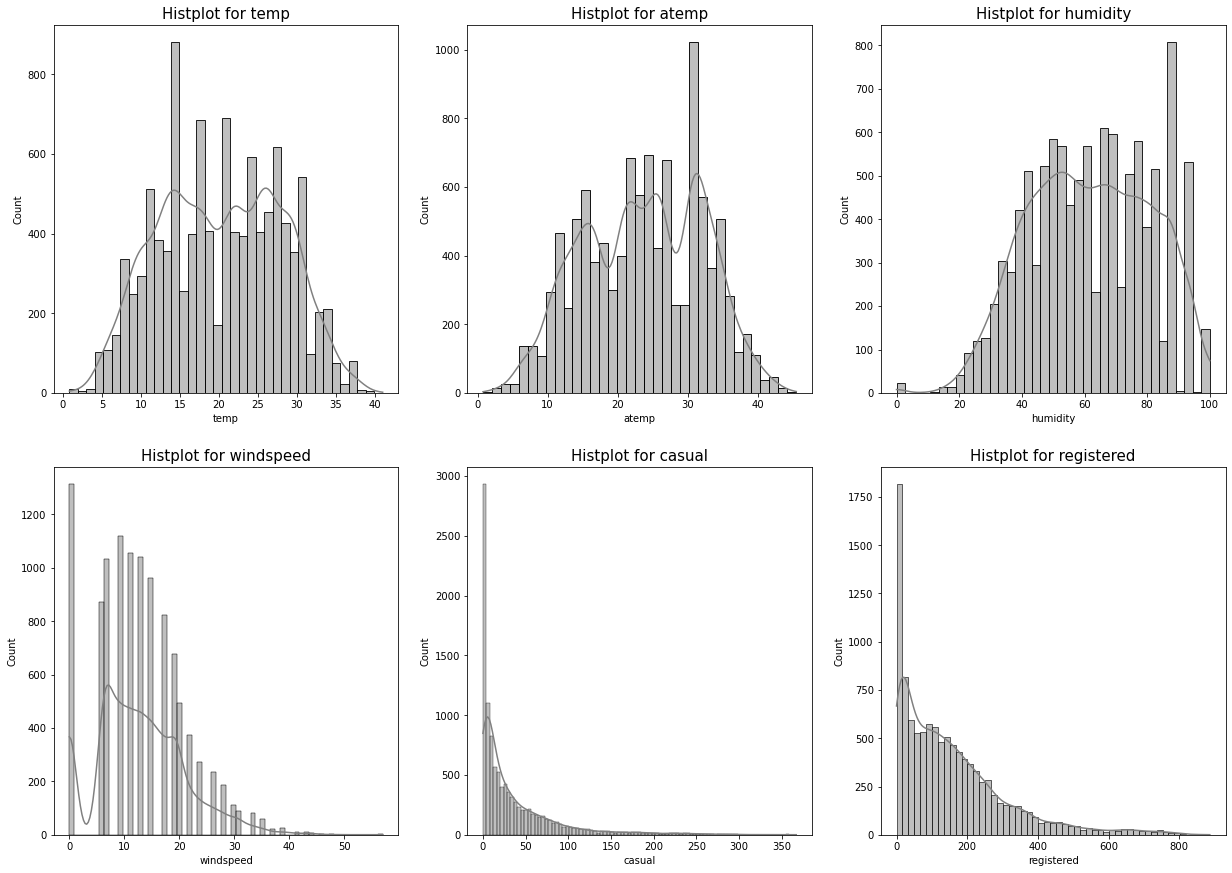

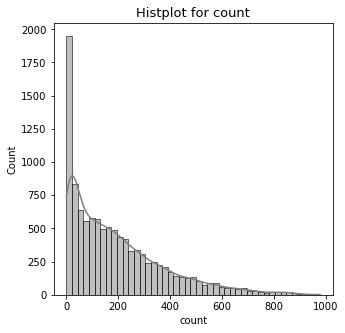

In [14]:
# univariate analysis using histogram for continuos columns

fig, axis = plt.subplots(nrows=2, ncols=3, figsize=(21,6))
fig.subplots_adjust(top=2)

count=0
for i in range(2):
    for j in range(3):
        sns.histplot(data=df, x=numerical_cols[count], ax=axis[i,j], kde=True, color='grey').set_title(f'Histplot for {numerical_cols[count]}', fontsize=15)
        count += 1
        
plt.figure(figsize=(5,5))
sns.histplot(data=df, x=numerical_cols[count], kde=True, color='grey').set_title(f'Histplot for {numerical_cols[count]}', fontsize=13)

plt.show()

- temp and humidity are normally distributed shoing a almost a gaussian curve.
- casual, registered and count are log normallly distributed showing log-normal distribution.

## Bivariate Analysis:

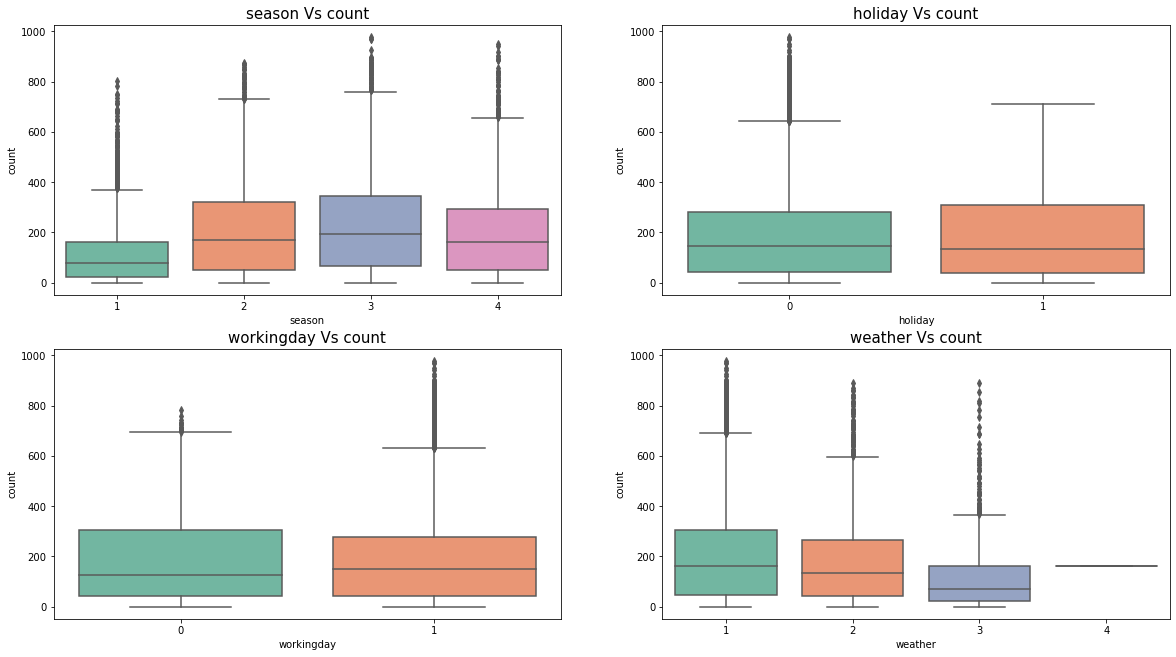

In [15]:
# Bivariate analysis using boxplot for categorical columns against count column

fig, axis = plt.subplots(nrows=2, ncols=2, figsize=(20,6))
fig.subplots_adjust(top=1.5)

count = 0
for i in range(2):
    for j in range(2):
        sns.boxplot(data=df, x=categorical_cols[count],y='count', ax=axis[i,j], palette='Set2').set_title(f'{categorical_cols[count]} Vs count', fontsize=15)
        count += 1
        
plt.show()

- More number of bikes were renetd in summer and fall season in comparison with spring and winter.
- There is no significant difference in the number of bikes rented in case of working day and holiday.
- More number of bikes are rented when the weather is clear. and very less number of bikes are rented when the weather is bad like Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog.

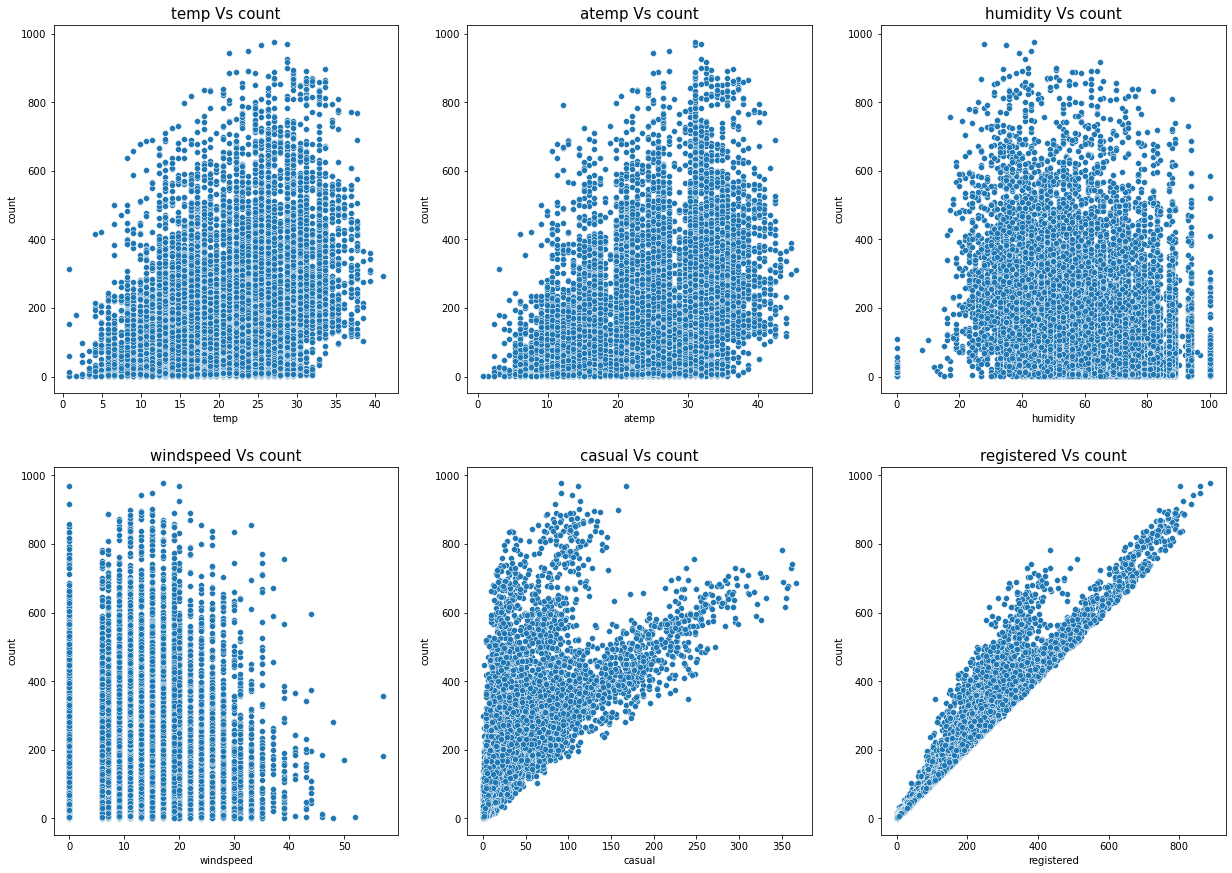

In [16]:
# Bivariate analysis using scatterplot for continuos columns against count column

fig, axis = plt.subplots(nrows=2, ncols=3, figsize=(21,6))
fig.subplots_adjust(top=2)

count=0
for i in range(2):
    for j in range(3):
        sns.scatterplot(data=df, x=numerical_cols[count], y='count', ax=axis[i,j]).set_title(f'{numerical_cols[count]} Vs count', fontsize=15)
        count += 1


plt.show()

- Whenever the temp and feeling temp is very high i.e greater than 35 or very low i.e less than 10 the number bikes rented are less.
- Whenever the humidity is less than 20 which means the climate is kind of dry, number of bikes rented are very very low.
- Whenever the windspeed is greater than 35, number of bikes rented is less. This means that the weather is kind of windy due too which it is difficult to ride a bike.
- For registered users the count of bikes rented is linear i.e increasing as the registered users are increasing.

# Hypothesis Testing - 1

__H0__ (Null Hypothesis): Working Day has no effect on the number of electric cycles rented.

__H1__ (Alternate Hypothesis): Working Day has effect on the number of electric cycles rented.

Here we will be using __Two-Sample T-Test__ for testing above defined Null hypothesis.

Consider __Significance Level__: 0.05

Before conducting the two-sample T-Test we need to find if the given data groups have the same variance. If the ratio of the larger data groups to the small data group is less than 4:1 then we can consider that the given data groups have equal variance.

In [17]:
df0 = df[df['workingday']==0]['count'].values
df1 = df[df['workingday']==1]['count'].values

np.var(df0), np.var(df1)

(30171.346098942427, 34040.69710674686)

Here the ratio for above defined variances is 34040:30171 which way less than 4:1, hence the given data groups have equal variance

In [18]:
# Conducting the Two Sample T-test
stats.ttest_ind(df0, df1, equal_var=True)

Ttest_indResult(statistic=-1.2096277376026694, pvalue=0.22644804226361348)

__T-statistic: -1.2096277376026694__

__P-value: 0.22644804226361348__

__Significance Level: 0.05__

As __P-value > 0.05__, we have failed to reject the Null Hypothesis (H0).

Hence it is concluded that, __Working Day has no effect on the number of electric cycles rented__.

# Hypothesis Testing - 2

__H0__ (Null Hypothesis): Number of cycles rented is similar in different weather.

__H1__ (Alternate Hypothesis): Number of cycles rented is not similar in different weather.

Here we will be using __Annova Test__ for testing above defined Null hypothesis.

Consider __Significance Level__: 0.05

In [19]:
# defining the data groups for the ANOVA

gp1 = df[df['weather']==1]['count'].values
gp2 = df[df['weather']==2]['count'].values
gp3 = df[df['weather']==3]['count'].values
gp4 = df[df['weather']==4]['count'].values

# Conducting Annova Test
stats.f_oneway(gp1, gp2, gp3, gp4)

F_onewayResult(statistic=65.53024112793271, pvalue=5.482069475935669e-42)

__F-statistic: 65.53024112793271__

__P-value: 5.482069475935669e-42__

__Significance Level: 0.05__

As __P-value < 0.05__, we will be rejecting the Null Hypothesis (H0) and accepting the Alternate Hypothesis (H1)

Hence it is concluded that, __Number of cycles rented is not similar in different weather__.

# Hypothesis Testing - 3

__H0__ (Null Hypothesis): Number of cycles rented is similar in different seasons.

__H1__ (Alternate Hypothesis): Number of cycles rented is not similar in different seasons.

Here we will be using __Annova Test__ for testing above defined Null hypothesis.

Consider __Significance Level__: 0.05

In [20]:
# defining the data groups for the ANOVA

gp1 = df[df['season']==1]['count'].values
gp2 = df[df['season']==2]['count'].values
gp3 = df[df['season']==3]['count'].values
gp4 = df[df['season']==4]['count'].values

# Conducting Annova Test
stats.f_oneway(gp1, gp2, gp3, gp4)

F_onewayResult(statistic=236.94671081032106, pvalue=6.164843386499654e-149)

__F-statistic: 236.94671081032106__

__P-value: 6.164843386499654e-149_

__Significance Level: 0.05__

As __P-value < 0.05__, we will be rejecting the Null Hypothesis (H0) and accepting the Alternate Hypothesis (H1)

Hence it is concluded that, __Number of cycles rented is not similar in different seasons__.

# Hypothesis Testing - 4

__H0__ (Null Hypothesis): Weather is not dependent on Season.

__H1__ (Alternate Hypothesis): Weather is dependent on Season.

Here we will be using __Chi-Square__ for testing above defined Null hypothesis.

Consider __Significance Level__: 0.05

In [21]:
data_table = pd.crosstab(df['season'], df['weather'])
data_table

weather,1,2,3,4
season,,,,
1,1759,715,211,1
2,1801,708,224,0
3,1930,604,199,0
4,1702,807,225,0


In [22]:
val = stats.chi2_contingency(data_table)
expected_values = val[3]
expected_values

array([[1.77454639e+03, 6.99258130e+02, 2.11948742e+02, 2.46738931e-01],
       [1.80559765e+03, 7.11493845e+02, 2.15657450e+02, 2.51056403e-01],
       [1.80559765e+03, 7.11493845e+02, 2.15657450e+02, 2.51056403e-01],
       [1.80625831e+03, 7.11754180e+02, 2.15736359e+02, 2.51148264e-01]])

In [23]:
nrows, ncols = 4, 4
dof = (nrows-1)*(ncols-1)
print("degrees of freedom: ", dof)
alpha = 0.05


chi_sqr = sum([(observed - expected)**2/expected for observed, expected in zip(data_table.values, expected_values)])
chi_sqr_statistic = chi_sqr[0] + chi_sqr[1]

critical_val = stats.chi2.ppf(q=1-alpha, df=dof)

p_val = 1-stats.chi2.cdf(x=chi_sqr_statistic, df=dof)

print(f'{chi_sqr_statistic}, {critical_val}, {p_val}')

degrees of freedom:  9
44.09441248632364, 16.918977604620448, 1.3560001579371317e-06


__Chi Square Statistic: 44.09441248632364__

__Critical Value : 16.918977604620448__

__P-value: 1.3560001579371317e-06__

__Significance Level: 0.05__

As __P-value < 0.05__, we will be rejecting the Null Hypothesis (H0) and accepting the Alternate Hypothesis (H1)

Hence it is concluded that, __Weather is dependent on the Seasons__.

# Insights:

- There are equal number of days in every season.
- There are less number of holidays and more number of working days.
- Weather conditions are mostly Clear/ Few clouds/ partly cloudy/ partly cloudy. Sometimes it maybe Mist + Cloudy/ Mist + Broken clouds/ Mist + Few clouds/ Mist.
- More number of bikes were renetd in summer and fall season in comparison with spring and winter.
- There is no significant difference in the number of bikes rented whether it is a holiday or not.
- There is no significant difference in the number of bikes rented in case of working day or weekend.
- More number of bikes are rented when the weather is clear. and very less number of bikes are rented when the weather is bad like Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog.
- Whenever the temp and feeling temp is very high i.e greater than 35 or very low i.e less than 10 the number bikes rented are less.
- Whenever the humidity is less than 20 which means the climate is kind of dry, number of bikes rented are very very low.
- Whenever the windspeed is greater than 35, number of bikes rented is less. This means that the weather is kind of windy due too which it is difficult to ride a bike.
- For registered users the count of bikes rented is linear i.e increasing as the registered users are increasing.

# Recommendations:

- In summer and fall seasons the company should have more bikes in stock to be rented. Because the demand in these seasons is higher as compared to other seasons.
- In very low humid days, company should have less bikes in the stock to be rented.
- Whenever temperature is less than 10 or in very cold days, company should have less bikes. They can use the bikes from these chilly areas in the areas where the temperature is good and the demand is high
- Whenever the windspeed is greater than 35 or in thunderstorms, company should have less bikes in stock to be rented.
- As the number of bikes rented is increasing with increase in number of registered users, company focus more on capturing more number of customers. Maybe they can spend higher on their marketing budget.
- As there is no significant difference in workingday and weekend, company should try to increase the number of bikes rented during the workingday and should target the customer who are working professional so that they use the electric bikes instead of public transport. This will increase the company revenue as the population of working professionals is high. For this company can offer discounted costs to customers during working days which will be beneficial for working professionals and will attract more customers.